In [1]:
"""
Created on Sat Aug 3 18:05:33 2024
@author: shikha
"""
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the current working directory
current_directory = os.getcwd()
os.chdir(current_directory)

# Loading the annotation CSV file
ann_file_path = 'data/annotations.csv'  # Annotation file name (can also pass the full path to the file)
df_ann = pd.read_csv(ann_file_path)  # Reading the .csv file

################# Checking for any empty rows ##############################
# Checking whether each row contains any missing values
missing_values_per_row = df_ann.isna().any(axis=1)
# Counting the number of rows that contain any missing values
number_of_empty_rows = missing_values_per_row.sum()
# Printing the number of empty rows
print(f'Number of rows with missing values: {number_of_empty_rows}')

if number_of_empty_rows > 0:
    # Printing the rows with missing values for inspection
    empty_rows = df_ann[missing_values_per_row]
    print(empty_rows)
#######################################################################################


Number of rows with missing values: 0


In [2]:
################# Visualization of the Data Distribution by Class ##############################
# Displaying the first few rows of the annotation dataframe to understand its structure
print(df_ann.head())

# Printing the column names (fields of each column)
print("Columns in the dataset:", df_ann.columns.tolist())

# Creating a folder to save the dataset plots
output_dir = 'dataset_plots/sns_dataset_plots'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)



      Image Name Majority Vote Label  \
0  MHIST_aaa.png                 SSA   
1  MHIST_aab.png                  HP   
2  MHIST_aac.png                 SSA   
3  MHIST_aae.png                  HP   
4  MHIST_aaf.png                 SSA   

   Number of Annotators who Selected SSA (Out of 7) Partition  
0                                                 6     train  
1                                                 0     train  
2                                                 5     train  
3                                                 1     train  
4                                                 5     train  
Columns in the dataset: ['Image Name', 'Majority Vote Label', 'Number of Annotators who Selected SSA (Out of 7)', 'Partition']


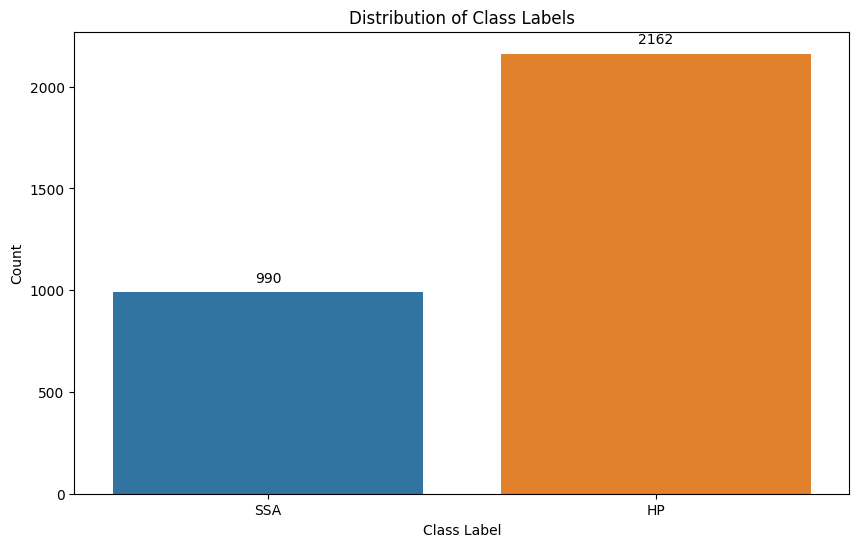

In [3]:
###################################
# Visualization of the Distribution of the 'Majority Vote Label' Column
plt.figure(figsize=(10, 6))  # Setting the figure size

# Creating a count plot for the "Majority Vote Label" based on classes "HP" and "SSA"
ax = sns.countplot(data=df_ann, x='Majority Vote Label')

# Adding the count at the top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), textcoords='offset points')

# Adding title and labels
plt.title('Distribution of Class Labels')  # Title of the plot
plt.xlabel('Class Label')  # X-axis label
plt.ylabel('Count')  # Y-axis label

# Saving the plot with full resolution
plot_filename = os.path.join(output_dir, 'distribution_of_class_labels.png')
plt.savefig(plot_filename, dpi=300, bbox_inches='tight') 

# Displaying the plot
plt.show()
###################################

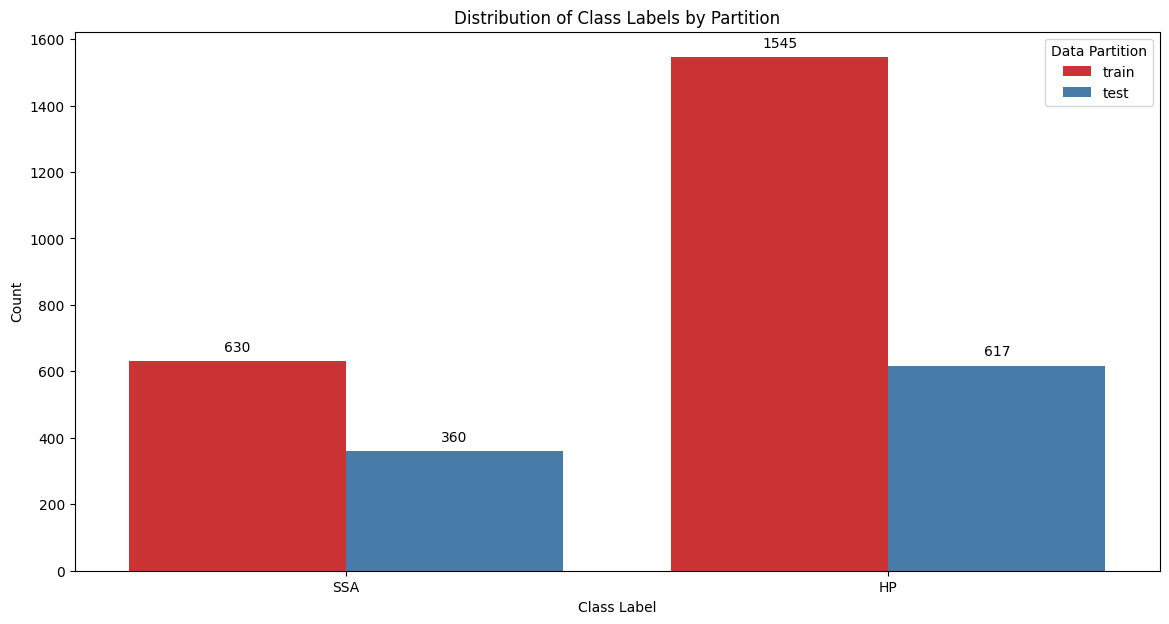

In [4]:
###################################
# Visualization of the Distribution of the 'Majority Vote Label' Column by 'Partition'

# Counts each class label for both 'train' and 'test' partitions
plt.figure(figsize=(14, 7))  # Setting the figure size

# Creating a count plot for 'Majority Vote Label' with 'Partition' as the hue
ax = sns.countplot(data=df_ann, x='Majority Vote Label', hue='Partition', palette='Set1')

# Adding the count at the top of each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', 
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', 
                    xytext=(0, 10), textcoords='offset points')

# Adding title and labels
plt.title('Distribution of Class Labels by Partition')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.legend(title='Data Partition')

# Saving the plot with full resolution
plot_filename = os.path.join(output_dir, 'distribution_of_class_labels_by_partition.png')
plt.savefig(plot_filename, dpi=300, bbox_inches='tight') 

# Displaying the plot
plt.show()
###################################


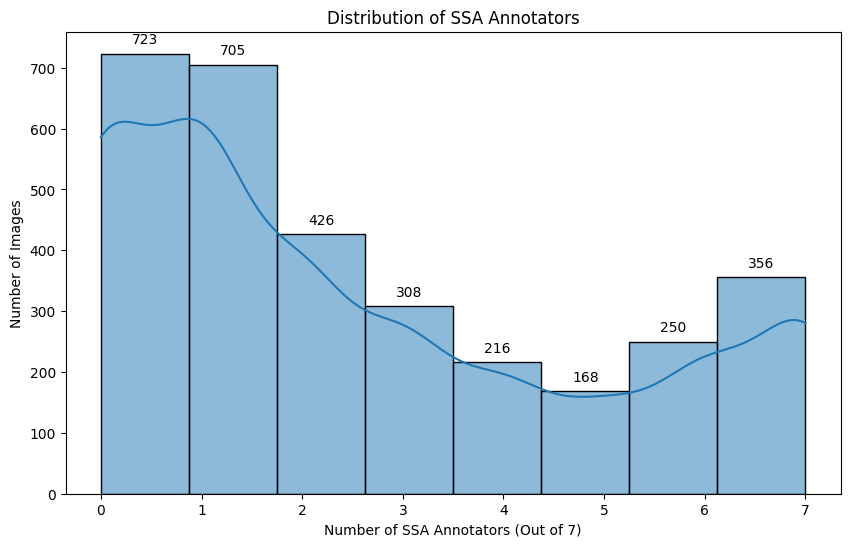

In [5]:
###################################
# Visualization of the Distribution of the Number of Annotators who Selected SSA for the Entire Dataset

plt.figure(figsize=(10, 6))  # Setting the figure size

# Creating a histogram with KDE for the number of annotators who selected SSA
ax = sns.histplot(data=df_ann, x='Number of Annotators who Selected SSA (Out of 7)', bins=8, kde=True)

# The KDE curve is overlaid on the histogram bars to show a smoothed estimate of the data distribution

# Adding the count at the top of each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only if the bar height is greater than 0
        ax.annotate(f'{int(height)}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='center', 
                    xytext=(0, 10), textcoords='offset points')

# Adding title and labels
plt.title('Distribution of SSA Annotators')  # Title of the plot
plt.xlabel('Number of SSA Annotators (Out of 7)')  # X-axis label
plt.ylabel('Number of Images')  # Y-axis label

# Saving the plot with full resolution
plot_filename = os.path.join(output_dir, 'distribution_of_SSA_annotators.png')
plt.savefig(plot_filename, dpi=300, bbox_inches='tight')

# Displaying the plot
plt.show()
###################################


/home/shikha/anaconda3/envs/torch_vs/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


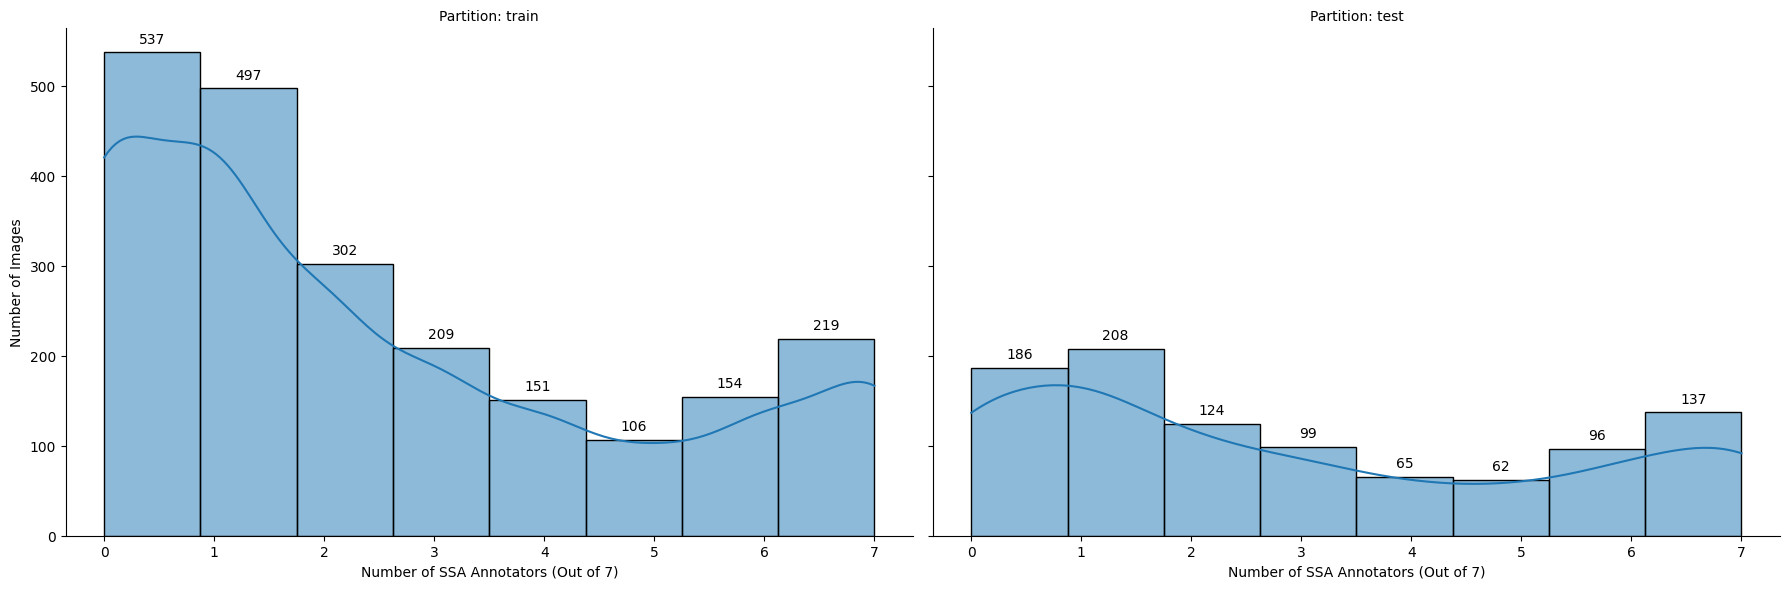

In [6]:
###################################
# Visualization of the Distribution of the Number of Annotators who Selected SSA with Dataset Partition

# Filtering the data to include only valid annotator values (0 to 7)
df_filtered = df_ann[df_ann['Number of Annotators who Selected SSA (Out of 7)'].isin(range(8))]

# Creating a FacetGrid for the train and test partitions
g = sns.FacetGrid(df_filtered, col="Partition", sharey=True, height=6, aspect=1.5)

# Mapping the histplot to the FacetGrid with KDE
g.map_dataframe(sns.histplot, x='Number of Annotators who Selected SSA (Out of 7)', bins=8, kde=True)

# The KDE curve is overlaid on the histogram bars to show a smoothed estimate of the data distribution

# Adding the count at the top of each bar
for ax in g.axes.flatten():
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Titles and labels
g.tight_layout()
g.set_titles(col_template="Partition: {col_name}")
g.set_axis_labels("Number of SSA Annotators (Out of 7)", "Number of Images")

# Saving the plot
plot_filename = os.path.join(output_dir, 'distribution_of_SSA_annotators_by_partition.png')
plt.savefig(plot_filename, dpi=300, bbox_inches='tight') 
plt.show()  # Displaying the plot
####################################



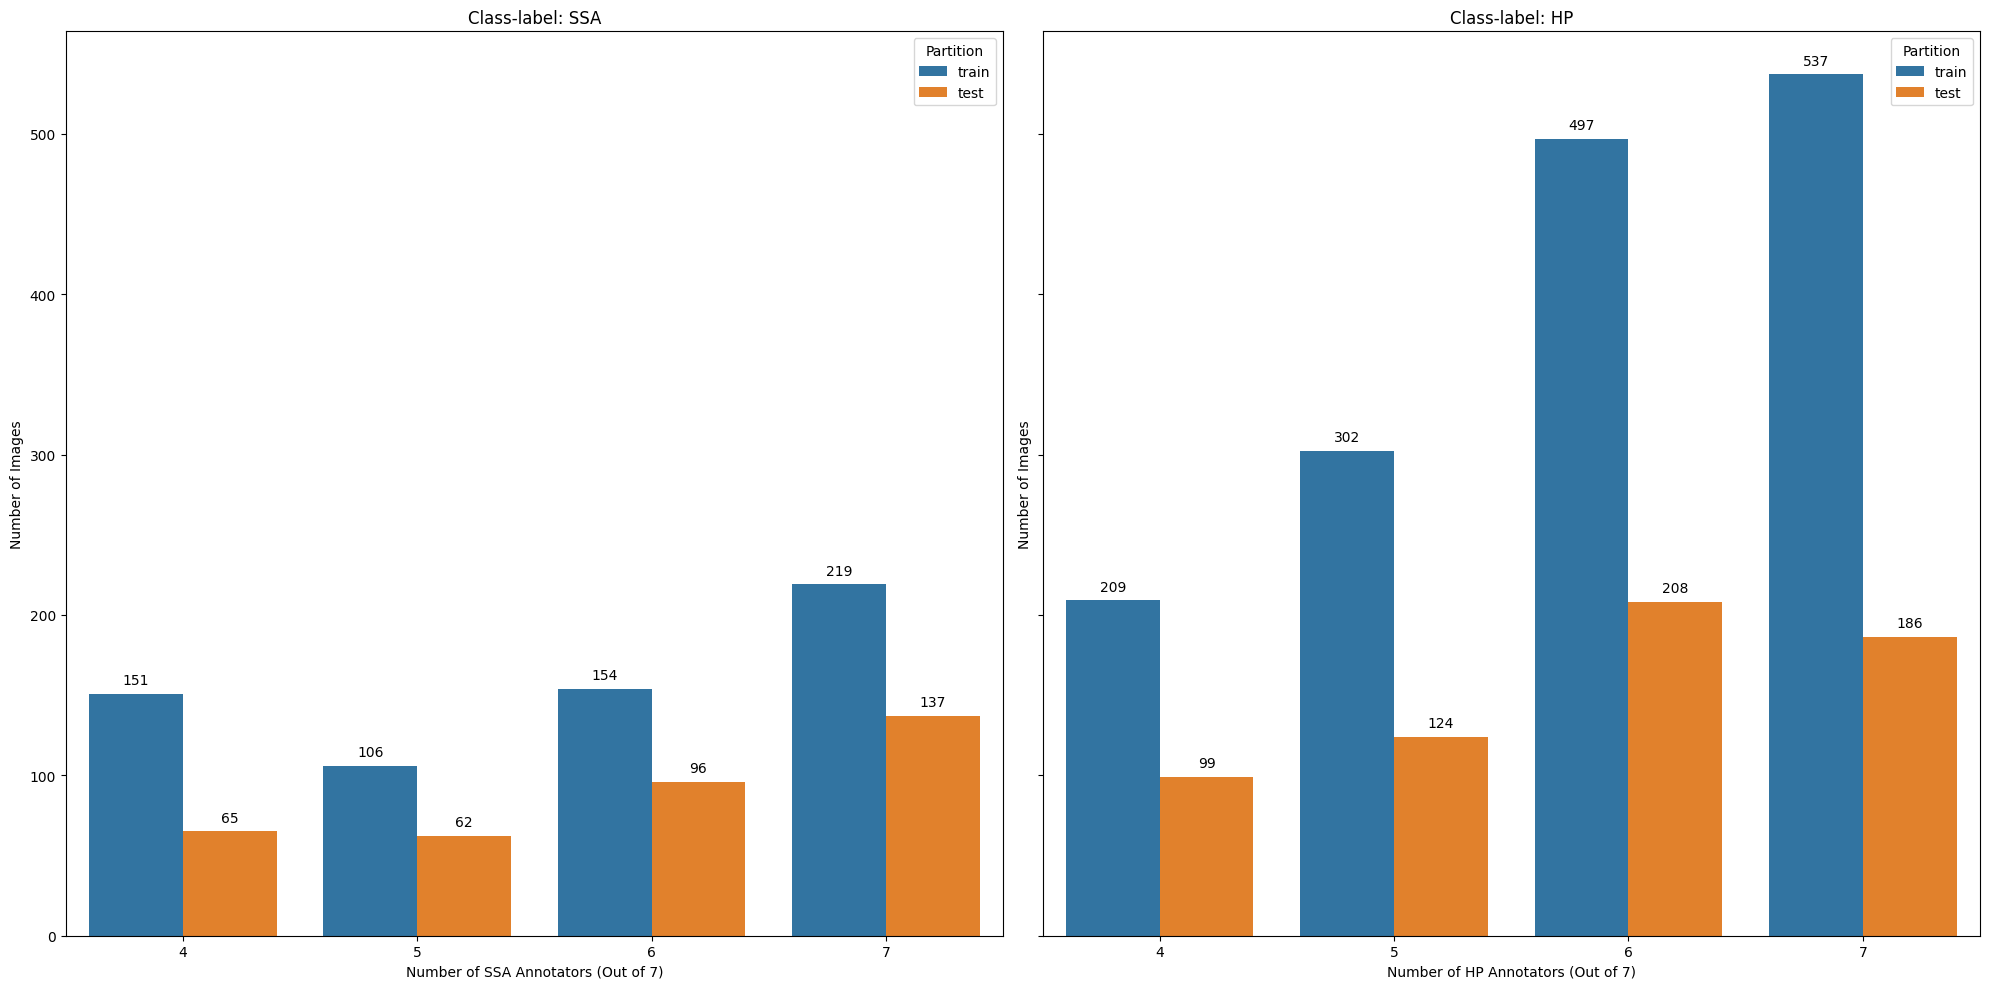

In [7]:
###################################
# Visualization of Data Distribution Based on Class-Label, Partition, and Number of Annotators

# Creating a new column for the HP class that maps 0 -> 7, 1 -> 6, 2 -> 5, 3 -> 4 for 'HP' class-label
df_filtered['HP Annotators'] = df_filtered['Number of Annotators who Selected SSA (Out of 7)'].apply(
    lambda x: 7 - x if df_filtered['Majority Vote Label'][df_filtered['Number of Annotators who Selected SSA (Out of 7)'] == x].values[0] == 'HP' else x
)

# Separating the filtered data by class-label
df_ann_ssa = df_filtered[df_filtered['Majority Vote Label'] == 'SSA']
df_ann_hp = df_filtered[df_filtered['Majority Vote Label'] == 'HP']

# Creating a figure with two subplots next to each other
fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharey=True)

# Plotting SSA class
ax = sns.countplot(data=df_ann_ssa, x='Number of Annotators who Selected SSA (Out of 7)', hue='Partition', ax=axes[0])
axes[0].set_title('Class-label: SSA')
axes[0].set_xlabel('Number of SSA Annotators (Out of 7)')
axes[0].set_ylabel('Number of Images')

# Adding the count at the top of each bar for SSA
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Plotting HP class
ax = sns.countplot(data=df_ann_hp, x='HP Annotators', hue='Partition', ax=axes[1])
axes[1].set_title('Class-label: HP')
axes[1].set_xlabel('Number of HP Annotators (Out of 7)')
axes[1].set_ylabel('Number of Images')

# Adding the count at the top of each bar for HP
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Adjusting layout and saving the plot
plt.tight_layout()
plot_filename = os.path.join(output_dir, 'distribution_of_SSA_HP_annotators_by_partition_label.png')
plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
plt.show()
###################################


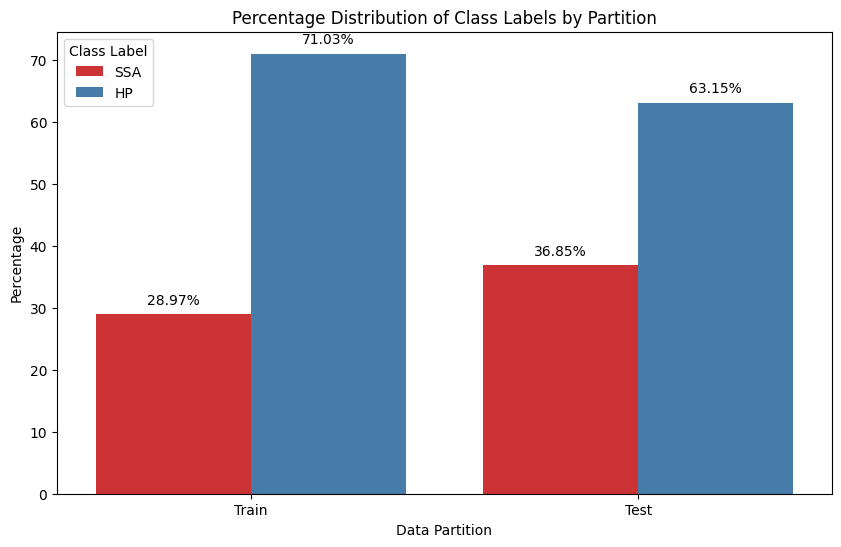

In [8]:
###################################
# Visualization of Class Imbalance with Percentage Data Distribution

# Calculating percentage distribution of 'SSA' and 'HP' within the train and test partitions
train_counts = df_ann[df_ann['Partition'] == 'train']['Majority Vote Label'].value_counts(normalize=True) * 100
test_counts = df_ann[df_ann['Partition'] == 'test']['Majority Vote Label'].value_counts(normalize=True) * 100

# Create a new DataFrame for plotting
df_percentage = pd.DataFrame({
    'Partition': ['Train', 'Train', 'Test', 'Test'],
    'Class Label': ['SSA', 'HP', 'SSA', 'HP'],
    'Percentage': [train_counts['SSA'], train_counts['HP'], test_counts['SSA'], test_counts['HP']]
})

# Plot percentage distribution
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_percentage, x='Partition', y='Percentage', hue='Class Label', palette='Set1')

# Adding title and labels
plt.title('Percentage Distribution of Class Labels by Partition')
plt.xlabel('Data Partition')
plt.ylabel('Percentage')

# Adding the percentage at the top of each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Saving and displaying the plot
plot_filename = os.path.join(output_dir, 'percentage_distribution_of_class_labels.png')
plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
plt.show()
###################################
